## ⚖️ 6. Visualize communities on cooperation-competition plot

In [ ]:
# This script is forked from Daniel's cooccurrence repo
# https://github.com/cdanielmachado/cooccurrence/blob/master/notebooks/Figure%201.ipynb

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
from random import sample

In [3]:
sns.set_palette('deep')

### Load simulation results

In [4]:
types = [ "gut_normal" ,"gut_impaired","gut_t2d","gut_refseq","kefir","soil"]
#types = ["random", "bin_rnd_01", "bin_rnd_001", "gut_normal" ,"gut_impaired","gut_t2d","gut_refseq","kefir"]
#types = ["random", "bin_rnd_01", "bin_rnd_001",]

In [6]:
dfs = []
for commtype in types:
    dfi = pd.concat(pd.read_csv(filename, sep='\t', dtype={'mip': float, 'mro': float})
                    for filename in glob(f"../data/cooccurrence/simulation/mip_mro/{commtype}/*_global.tsv"))
    dfi['type'] = commtype
    dfs.append(dfi)
df = pd.concat(dfs)
df.reset_index(inplace=True)
df.dropna(inplace=True)
df["community size"] = df["size"]


In [7]:
df


,index,community,medium,size,mip,mro,type,community size
0,0,sim_47,complete,5,9.0,0.704819,gut_normal,5
1,1,sim_87,complete,5,9.0,0.704819,gut_normal,5
2,2,sim_82,complete,5,9.0,0.704819,gut_normal,5
3,3,sim_68,complete,5,9.0,0.704819,gut_normal,5
4,4,sim_54,complete,5,7.0,0.680723,gut_normal,5
...,...,...,...,...,...,...,...,...
720,95,sim_24,complete,5,14.0,0.578947,soil,5
721,96,sim_63,complete,5,15.0,0.598958,soil,5
722,97,sim_56,complete,5,16.0,0.589474,soil,5
723,98,sim_25,complete,5,15.0,0.557292,soil,5


## Plotting

In [31]:
sizes = [5]
subdf = df[df["size"].isin(sizes)].copy()
subdf["Competition"] = subdf["mro"]
subdf["Cooperation"] = subdf["mip"]

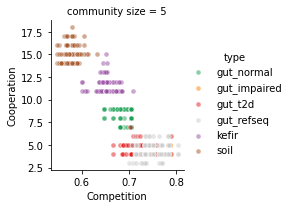

In [32]:
palette = {"gut_normal": '#1ba055', "gut_impaired": '#ff7f00', "gut_t2d": '#e41a1c', "gut_refseq": '#cccccc',"kefir":'#984ea3',"soil":'#a65628'}
g = sns.FacetGrid(subdf, col="community size", hue="type", height=3,hue_order=types, palette=palette)
g.map(plt.scatter, "Competition", "Cooperation", alpha=0.5, s=25, linewidths=0.7, edgecolors='w');
g.add_legend()
g.savefig("../plots/global_polarization/mip_mpro.png", dpi=300)

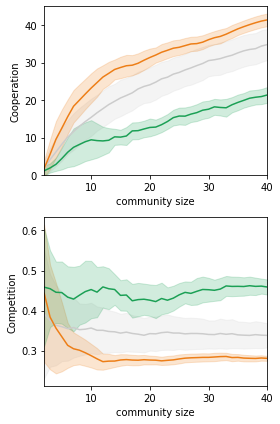

In [8]:
f, axs = plt.subplots(2,1, figsize=(4,6))
sns.lineplot(data=df, x="community size", y="mip", hue="type", ci="sd", palette=palette, legend=False, ax=axs[0])
sns.lineplot(data=df, x="community size", y="mro", hue="type", ci="sd", palette=palette, legend=False, ax=axs[1])

axs[0].set_xlim(2,40)
axs[0].set_ylim(0,45)
axs[0].set_ylabel("Cooperation")
axs[0].set_yticks([0, 10, 20, 30, 40])

axs[1].set_xlim(2,40)
axs[1].set_ylabel("Competition")
axs[1].set_yticks([0.3, 0.4, 0.5, 0.6])
plt.tight_layout()

plt.savefig("../plots/global_polarization/cooccurrence_plots.png", dpi=300)

## Move on to [exercise 7](https://github.com/franciscozorrilla/SymbNET/blob/main/scripts/7.generate_ensemble_models.md)